# Analyze influence of stadium capacity (DRAFT)

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# function for data processing

def prep(df):
    # drop unplayed games
    df.dropna(inplace=True)

    # split "Result" column into aray of two strings
    df['Result2'] = df['Result'].apply(lambda x: x.split(' - '))
    
    # create one-hot encoding columns for results
    df['Home Team Win'] = 0
    df['Away Team Win'] = 0
    df['Draw'] = 0

    # create columns for points
    df['Home Team Points'] = 0
    df['Away Team Points'] = 0

    # fill new columns
    for i in df.index:
        if int(df.loc[i, 'Result2'][0]) > int(df.loc[i, 'Result2'][1]):
            df.loc[i, 'Home Team Win'] = 1
            df.loc[i, 'Home Team Points'] = 3
        elif int(df.loc[i, 'Result2'][0]) < int(df.loc[i, 'Result2'][1]):
            df.loc[i, 'Away Team Win'] = 1
            df.loc[i, 'Away Team Points'] = 3
        else:
            df.loc[i, 'Draw'] = 1
            df.loc[i, 'Home Team Points'] = 1
            df.loc[i, 'Away Team Points'] = 1

    return df

## Find teams that appear in both seasons

In [ ]:
# def team_intersection(datalink1, datalink2):
#     df_1 = pd.read_csv(datalink1)
#     df_2 = pd.read_csv(datalink2)

#     df_1 = prep(df_18)
#     df_2 = prep(df_20)

#     return list(filter(lambda x: x in df_1['Home Team'].unique(), df_2['Home Team'].unique()))

In [ ]:
# load results from Bundesliga 

df_18 = pd.read_csv('data/bundesliga-2018-WEuropeStandardTime.csv')
df_20 = pd.read_csv('data/bundesliga-2020-WEuropeStandardTime.csv')

df_18 = prep(df_18)
df_20 = prep(df_20)

In [ ]:
sorted(list(df_18['Home Team'].unique()))

In [ ]:
sorted(list(df_20['Home Team'].unique()))

In [ ]:
df_20 = df_20.replace(['TSG Hoffenheim'],'TSG 1899 Hoffenheim')

## Stadium Capacity

In [9]:
df_stadium_buli = pd.read_csv('data/stadium/Bundesliga_2020_2021.csv', sep=';')

In [10]:
df_stadium_buli.drop(11, axis=0, inplace=True)

In [11]:
df_stadium_buli

,Stadium,Capacity
0,Signal Iduna Park (Borussia Dortmund),81.365
1,Allianz Arena (FC Bayern Munich),75.024
2,Olympiastadion (Hertha BSC Berlin),74.400
3,Veltins Arena (FC Schalke 04),62.271
4,Mercedes-Benz Arena (VfB Stuttgart),60.449
5,Borussia-Park (Borussia Mönchengladbach),54.022
6,Deutsche Bank Park (Eintracht Frankfurt),51.500
7,Red Bull Arena (Leipzig),42.558
8,Wohninvest Weserstadion (SV Werder Bremen),42.100
9,Opel Arena (1. FSV Mainz 05),34.000


In [12]:
df_stadium_buli['Team'] = ['Borussia Dortmund',
                            'FC Bayern München',
                            'Hertha BSC',
                            'FC Schalke 04',
                            'VfB Stuttgart',
                            'Borussia Mönchengladbach',
                            'Eintracht Frankfurt',
                            'RB Leipzig',
                            'SV Werder Bremen',
                            '1. FSV Mainz 05',
                            'FC Augsburg',
                            'Bayer 04 Leverkusen',
                            'TSG 1899 Hoffenheim',
                            'VfL Wolfsburg',
                            ' ',
                            'Sport-Club Freiburg',
                            ' '
                            ]

In [13]:
df_stadium_buli

,Stadium,Capacity,Team
0,Signal Iduna Park (Borussia Dortmund),81.365,Borussia Dortmund
1,Allianz Arena (FC Bayern Munich),75.024,FC Bayern München
2,Olympiastadion (Hertha BSC Berlin),74.400,Hertha BSC
3,Veltins Arena (FC Schalke 04),62.271,FC Schalke 04
4,Mercedes-Benz Arena (VfB Stuttgart),60.449,VfB Stuttgart
5,Borussia-Park (Borussia Mönchengladbach),54.022,Borussia Mönchengladbach
6,Deutsche Bank Park (Eintracht Frankfurt),51.500,Eintracht Frankfurt
7,Red Bull Arena (Leipzig),42.558,RB Leipzig
8,Wohninvest Weserstadion (SV Werder Bremen),42.100,SV Werder Bremen
9,Opel Arena (1. FSV Mainz 05),34.000,1. FSV Mainz 05



### Join stadium capacity to results

In [14]:
df_18.merge(df_stadium_buli.drop('Stadium', axis=1), left_on='Home Team', right_on='Team', how='inner').drop('Team', axis=1)
# .isna().sum()

,Match Number,Round Number,Date,Location,Home Team,Away Team,Result,Result2,Home Team Win,Away Team Win,Draw,Home Team Points,Away Team Points,Capacity
0,1,1,24/08/2018 20:30,Allianz Arena,FC Bayern München,TSG 1899 Hoffenheim,3 - 1,"[3, 1]",1,0,0,3,0,75.024
1,20,3,15/09/2018 15:30,Allianz Arena,FC Bayern München,Bayer 04 Leverkusen,3 - 1,"[3, 1]",1,0,0,3,0,75.024
2,38,5,25/09/2018 20:30,Allianz Arena,FC Bayern München,FC Augsburg,1 - 1,"[1, 1]",0,0,1,1,1,75.024
3,55,7,06/10/2018 18:30,Allianz Arena,FC Bayern München,Borussia Mönchengladbach,0 - 3,"[0, 3]",0,1,0,0,3,75.024
4,82,10,03/11/2018 15:30,Allianz Arena,FC Bayern München,Sport-Club Freiburg,1 - 1,"[1, 1]",0,0,1,1,1,75.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,227,26,16/03/2019 15:30,VELTINS Arena,FC Schalke 04,RB Leipzig,0 - 1,"[0, 1]",0,1,0,0,3,62.271
251,245,28,06/04/2019 15:30,VELTINS Arena,FC Schalke 04,Eintracht Frankfurt,1 - 2,"[1, 2]",0,1,0,0,3,62.271
252,263,30,20/04/2019 20:30,VELTINS Arena,FC Schalke 04,TSG 1899 Hoffenheim,2 - 5,"[2, 5]",0,1,0,0,3,62.271
253,281,32,05/05/2019 13:30,VELTINS Arena,FC Schalke 04,FC Augsburg,0 - 0,"[0, 0]",0,0,1,1,1,62.271


## Final standings

In [15]:
df_table_buli_18 = pd.read_csv('data/bundesliga_table_18_19.csv', sep=';')

In [16]:
df_table_buli_18['Standing'] = np.arange(1,19)

In [17]:
df_table_buli_18

,Team,Goaldifference,Points,Standing
0,FC Bayern München,56,78,1
1,Borussia Dortmund,37,76,2
2,RB Leipzig,34,66,3
3,Bayer 04 Leverkusen,17,58,4
4,Borussia Mönchengladbach,13,55,5
5,VfL Wolfsburg,12,55,6
6,Eintracht Frankfurt,12,54,7
7,SV Werder Bremen,9,53,8
8,TSG 1899 Hoffenheim,18,51,9
9,Fortuna Düsseldorf 1895 e.V.,-16,44,10



### Merge with stadium capacity

In [18]:
df_table_stadium_buli_18 = df_table_buli_18.merge(df_stadium_buli.drop('Stadium', axis=1), left_on='Team', right_on='Team', how='inner')#.drop('Team', axis=1)
# .isna().sum()

In [19]:
df_table_stadium_buli_18

,Team,Goaldifference,Points,Standing,Capacity
0,FC Bayern München,56,78,1,75.024
1,Borussia Dortmund,37,76,2,81.365
2,RB Leipzig,34,66,3,42.558
3,Bayer 04 Leverkusen,17,58,4,30.210
4,Borussia Mönchengladbach,13,55,5,54.022
5,VfL Wolfsburg,12,55,6,30.000
6,Eintracht Frankfurt,12,54,7,51.500
7,SV Werder Bremen,9,53,8,42.100
8,TSG 1899 Hoffenheim,18,51,9,30.150
9,Hertha BSC,-8,43,11,74.400


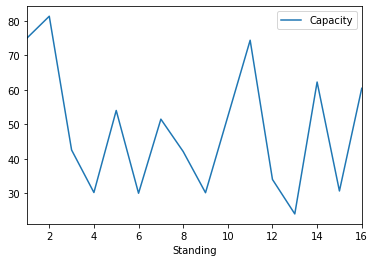

In [20]:
df_table_stadium_buli_18.plot(x='Standing', y='Capacity')

Instead of the above, compare number of home wins vs stadium capacity for each team in 18/19 and 20/11

In [21]:
df_stadium_epl = pd.read_csv('data/stadium/EPL_2020_2021.csv', sep=';')

In [22]:
df_stadium_epl

,Stadium,Capacity
0,Manchester United (Old Trafford),74.140
1,Tottenham Hotspur (Tottenham Hotspur Stadium),62.303
2,Arsenal FC (Emirates Stadium),60.704
3,West Ham United (Queen Elizabeth Olympic Park),60.000
4,Manchester City (Etihad Stadium),55.017
5,Liverpool FC (Anfield),53.394
6,Newcastle United (St James' Park),52.305
7,Aston Villa (Villa Park),42.749
8,Chelsea FC (Stamford Bridge),40.834
9,Everton FC (Goodison Park),39.414


In [23]:
df_stadium_serieA = pd.read_csv('data/stadium/SerieA_2020_2021.csv', sep=';')

In [24]:
df_stadium_serieA

,Stadium,Capacity
0,Giuseppe Meazza - Milan,80.018
1,Olimpico - Rome,72.698
2,San Paolo - Naples,60.240
3,Artemio Franchi - Florence,47.284
4,Allianz Stadium - Turin,41.254
5,Marcantonio Bentegodi - Verona,39.211
6,Renato Dall'Ara - Bologna,38.375
7,Luigi Ferraris - Genoa,36.603
8,Ennio Tardini - Parma,28.783
9,Olimpico - Turin,27.958


In [25]:
df_stadium_LaLiga = pd.read_csv('data/stadium/LaLiga_2020_2021.csv', sep=';')

In [26]:
df_stadium_LaLiga

,Stadium,Capacity
0,Camp Nou (FC Barcelona),99.787
1,Santiago Bernabeu (Real Madrid),85.454
2,Wanda Metropolitano (Atletico de Madrid),68.000
3,Benito Villamarin (Real Betis),60.721
4,Mestalla (Valencia),55.000
5,San Marmes (Athletic Club),53.332
6,Ramon Sanchez Pizjuan (Sevilla),42.714
7,Martinez Valero (Elche),33.732
8,Anoeta (Real Sociedad),32.076
9,Abanca Balaidos (Celta),28.700
